In [17]:
import sklearn

import shap

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [18]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


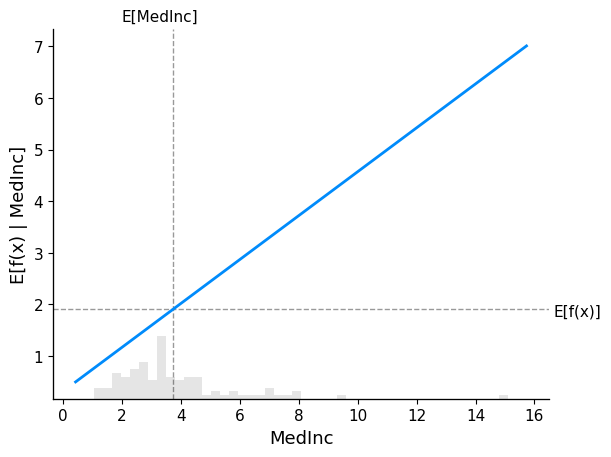

In [19]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [20]:
model.predict(X100).shape

(100,)

In [21]:
X100

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12953,3.7813,15.0,5.620058,1.013500,2868.0,2.765670,38.70,-121.28
18537,4.3000,20.0,6.270677,1.137845,981.0,2.458647,36.98,-122.00
13337,3.9107,27.0,5.572816,1.000000,321.0,3.116505,34.04,-117.68
12651,1.6521,36.0,4.068477,1.121606,2460.0,2.904368,38.52,-121.44
19986,2.3152,25.0,5.412844,1.055046,1424.0,3.266055,36.21,-119.32
...,...,...,...,...,...,...,...,...
6232,3.3523,25.0,4.997245,1.112948,1187.0,3.269972,34.07,-117.94
2782,1.2049,17.0,4.337500,1.206250,775.0,2.421875,32.74,-114.66
12601,1.9837,37.0,4.786517,1.014045,902.0,2.533708,38.53,-121.48
2198,7.5000,8.0,6.564885,0.946565,1111.0,2.826972,36.85,-119.88


In [25]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...,...
13339,5.7530,14.0,6.071023,0.980114,1151.0,3.269886,34.03,-117.66
2791,1.8325,25.0,4.279221,1.070130,1477.0,1.918182,37.37,-118.39
1550,6.8806,16.0,8.273632,1.042289,1272.0,3.164179,37.74,-121.93
17652,3.8936,13.0,4.128079,1.160099,710.0,1.748768,37.26,-121.88


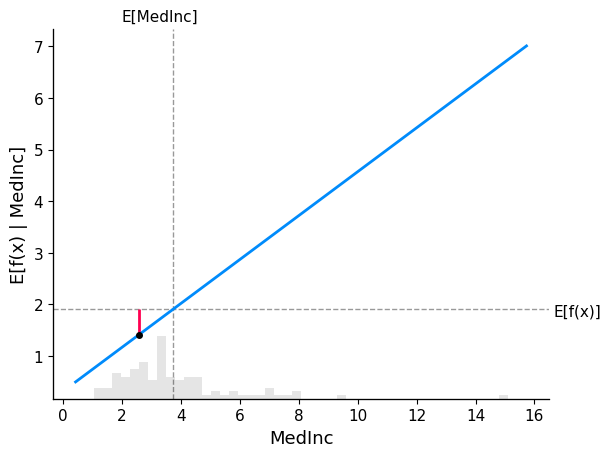

In [22]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

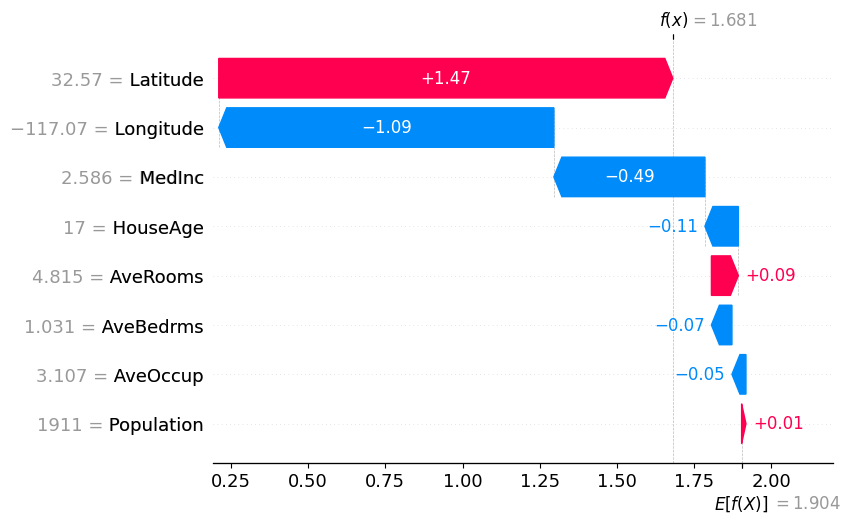

In [7]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [8]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
from keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Input,
    concatenate,
)
from keras.layers import Embedding
from keras.models import Model
from sklearn.model_selection import train_test_split

import shap

# print the JS visualization code to the notebook
shap.initjs()

2023-11-14 15:58:01.361784: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-14 15:58:01.361830: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-14 15:58:01.361856: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-14 15:58:01.368536: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-14 15:58:02.959542: W tensorflow/compiler/

In [10]:
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)

# normalize data (this is important for model convergence)
dtypes = list(zip(X.dtypes.index, map(str, X.dtypes)))
for k, dtype in dtypes:
    if dtype == "float32":
        X[k] -= X[k].mean()
        X[k] /= X[k].std()

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=7
)

In [ ]:
# build model
input_els = []
encoded_els = []
for k, dtype in dtypes:
    input_els.append(Input(shape=(1,)))
    if dtype == "int8":
        e = Flatten()(Embedding(X_train[k].max() + 1, 1)(input_els[-1]))
    else:
        e = input_els[-1]
    encoded_els.append(e)
encoded_els = concatenate(encoded_els)
layer1 = Dropout(0.5)(Dense(100, activation="relu")(encoded_els))
out = Dense(1)(layer1)

# train model
regression = Model(inputs=input_els, outputs=[out])
regression.compile(optimizer="adam", loss="binary_crossentropy")
regression.fit(
    [X_train[k].values for k, t in dtypes],
    y_train,
    epochs=50,
    batch_size=512,
    shuffle=True,
    validation_data=([X_valid[k].values for k, t in dtypes], y_valid),
)

In [12]:
def f(X):
    return regression.predict([X[:, i] for i in range(X.shape[1])]).flatten()

In [13]:

explainer = shap.KernelExplainer(f, X.iloc[:50, :])
shap_values = explainer.shap_values(X.iloc[299, :], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_display.iloc[299, :])

782/782 [==============================] - 1s 725us/step


In [14]:
shap_values50 = explainer.shap_values(X.iloc[280:330, :], nsamples=500)


  0%|                                                                                                                           | 0/50 [00:00<?, ?it/s]

782/782 [==============================] - 1s 709us/step


  2%|██▎                                                                                                                | 1/50 [00:00<00:48,  1.01it/s]

782/782 [==============================] - 1s 790us/step


  4%|████▌                                                                                                              | 2/50 [00:01<00:48,  1.00s/it]

782/782 [==============================] - 1s 770us/step


  6%|██████▉                                                                                                            | 3/50 [00:03<00:47,  1.00s/it]

782/782 [==============================] - 1s 764us/step


  8%|█████████▏                                                                                                         | 4/50 [00:04<00:46,  1.01s/it]

782/782 [==============================] - 1s 787us/step


 10%|███████████▌                                                                                                       | 5/50 [00:05<00:45,  1.01s/it]

782/782 [==============================] - 1s 756us/step


 12%|█████████████▊                                                                                                     | 6/50 [00:06<00:43,  1.00it/s]

782/782 [==============================] - 1s 722us/step


 14%|████████████████                                                                                                   | 7/50 [00:06<00:42,  1.02it/s]

782/782 [==============================] - 1s 704us/step


 16%|██████████████████▍                                                                                                | 8/50 [00:07<00:40,  1.03it/s]

782/782 [==============================] - 1s 693us/step


 18%|████████████████████▋                                                                                              | 9/50 [00:08<00:39,  1.04it/s]

782/782 [==============================] - 1s 722us/step


 20%|██████████████████████▊                                                                                           | 10/50 [00:09<00:38,  1.04it/s]

782/782 [==============================] - 1s 656us/step


 22%|█████████████████████████                                                                                         | 11/50 [00:10<00:36,  1.06it/s]

782/782 [==============================] - 1s 700us/step


 24%|███████████████████████████▎                                                                                      | 12/50 [00:11<00:35,  1.06it/s]

782/782 [==============================] - 1s 733us/step


 26%|█████████████████████████████▋                                                                                    | 13/50 [00:12<00:35,  1.04it/s]

782/782 [==============================] - 1s 675us/step


 28%|███████████████████████████████▉                                                                                  | 14/50 [00:13<00:34,  1.05it/s]

782/782 [==============================] - 1s 699us/step


 30%|██████████████████████████████████▏                                                                               | 15/50 [00:14<00:33,  1.05it/s]

782/782 [==============================] - 1s 680us/step


 32%|████████████████████████████████████▍                                                                             | 16/50 [00:15<00:31,  1.06it/s]

782/782 [==============================] - 1s 675us/step


 34%|██████████████████████████████████████▊                                                                           | 17/50 [00:16<00:30,  1.07it/s]

782/782 [==============================] - 1s 707us/step


 36%|█████████████████████████████████████████                                                                         | 18/50 [00:17<00:29,  1.07it/s]

782/782 [==============================] - 1s 672us/step


 38%|███████████████████████████████████████████▎                                                                      | 19/50 [00:18<00:28,  1.07it/s]

782/782 [==============================] - 1s 672us/step


 40%|█████████████████████████████████████████████▌                                                                    | 20/50 [00:19<00:27,  1.07it/s]

782/782 [==============================] - 1s 678us/step


 42%|███████████████████████████████████████████████▉                                                                  | 21/50 [00:20<00:26,  1.08it/s]

782/782 [==============================] - 1s 746us/step


 44%|██████████████████████████████████████████████████▏                                                               | 22/50 [00:21<00:26,  1.06it/s]

782/782 [==============================] - 1s 659us/step


 46%|████████████████████████████████████████████████████▍                                                             | 23/50 [00:21<00:25,  1.07it/s]

782/782 [==============================] - 1s 684us/step


 48%|██████████████████████████████████████████████████████▋                                                           | 24/50 [00:22<00:24,  1.08it/s]

782/782 [==============================] - 1s 703us/step


 50%|█████████████████████████████████████████████████████████                                                         | 25/50 [00:23<00:23,  1.08it/s]

782/782 [==============================] - 1s 683us/step


 52%|███████████████████████████████████████████████████████████▎                                                      | 26/50 [00:24<00:22,  1.08it/s]

782/782 [==============================] - 1s 663us/step


 54%|█████████████████████████████████████████████████████████████▌                                                    | 27/50 [00:25<00:21,  1.09it/s]

782/782 [==============================] - 1s 751us/step


 56%|███████████████████████████████████████████████████████████████▊                                                  | 28/50 [00:26<00:20,  1.06it/s]

782/782 [==============================] - 1s 723us/step


 58%|██████████████████████████████████████████████████████████████████                                                | 29/50 [00:27<00:19,  1.06it/s]

782/782 [==============================] - 1s 679us/step


 60%|████████████████████████████████████████████████████████████████████▍                                             | 30/50 [00:28<00:18,  1.05it/s]

782/782 [==============================] - 1s 707us/step


 62%|██████████████████████████████████████████████████████████████████████▋                                           | 31/50 [00:29<00:17,  1.06it/s]

782/782 [==============================] - 1s 653us/step


 64%|████████████████████████████████████████████████████████████████████████▉                                         | 32/50 [00:30<00:16,  1.07it/s]

782/782 [==============================] - 1s 639us/step


 66%|███████████████████████████████████████████████████████████████████████████▏                                      | 33/50 [00:31<00:15,  1.08it/s]

782/782 [==============================] - 1s 646us/step


 68%|█████████████████████████████████████████████████████████████████████████████▌                                    | 34/50 [00:32<00:14,  1.08it/s]

782/782 [==============================] - 1s 685us/step


 70%|███████████████████████████████████████████████████████████████████████████████▊                                  | 35/50 [00:33<00:13,  1.08it/s]

782/782 [==============================] - 1s 707us/step


 72%|██████████████████████████████████████████████████████████████████████████████████                                | 36/50 [00:34<00:13,  1.06it/s]

782/782 [==============================] - 1s 695us/step


 74%|████████████████████████████████████████████████████████████████████████████████████▎                             | 37/50 [00:35<00:12,  1.07it/s]

782/782 [==============================] - 1s 691us/step


 76%|██████████████████████████████████████████████████████████████████████████████████████▋                           | 38/50 [00:35<00:11,  1.08it/s]

782/782 [==============================] - 1s 716us/step


 78%|████████████████████████████████████████████████████████████████████████████████████████▉                         | 39/50 [00:36<00:10,  1.07it/s]

782/782 [==============================] - 1s 656us/step


 80%|███████████████████████████████████████████████████████████████████████████████████████████▏                      | 40/50 [00:37<00:09,  1.09it/s]

782/782 [==============================] - 1s 682us/step


 82%|█████████████████████████████████████████████████████████████████████████████████████████████▍                    | 41/50 [00:38<00:08,  1.08it/s]

782/782 [==============================] - 1s 664us/step


 84%|███████████████████████████████████████████████████████████████████████████████████████████████▊                  | 42/50 [00:39<00:07,  1.09it/s]

782/782 [==============================] - 1s 684us/step


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████                | 43/50 [00:40<00:06,  1.08it/s]

782/782 [==============================] - 1s 704us/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 44/50 [00:41<00:05,  1.08it/s]

782/782 [==============================] - 1s 724us/step


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 45/50 [00:42<00:04,  1.08it/s]

782/782 [==============================] - 1s 698us/step


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 46/50 [00:43<00:03,  1.08it/s]

782/782 [==============================] - 1s 699us/step


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 47/50 [00:44<00:02,  1.08it/s]

782/782 [==============================] - 1s 698us/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 48/50 [00:45<00:01,  1.08it/s]

782/782 [==============================] - 1s 663us/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 49/50 [00:46<00:00,  1.09it/s]

782/782 [==============================] - 1s 677us/step


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:46<00:00,  1.06it/s]


In [15]:
shap.force_plot(explainer.expected_value, shap_values50, X_display.iloc[280:330, :])
